2.9380680617205668e-15
2.9380680617205668e-15
2.9380680617205668e-15
2.938068061720566e-14
2.938068061720566e-14
2.938068061720566e-14
2.9380680617205662e-08
2.9380680617205662e-08
2.9380680617205662e-08
2.9380680617205668e-15
2.9380680617205668e-15
2.9380680617205668e-15
2.938068061720566e-14
2.938068061720566e-14
2.938068061720566e-14
2.9380680617205662e-08
2.9380680617205662e-08
2.9380680617205662e-08


(350.0, 950.0)

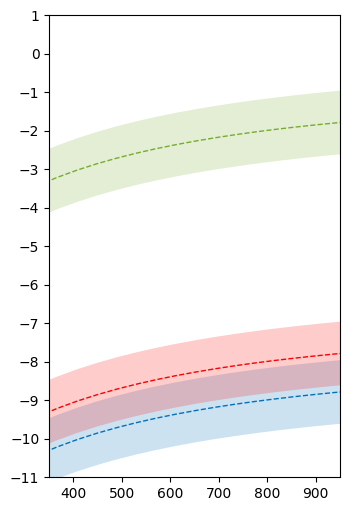

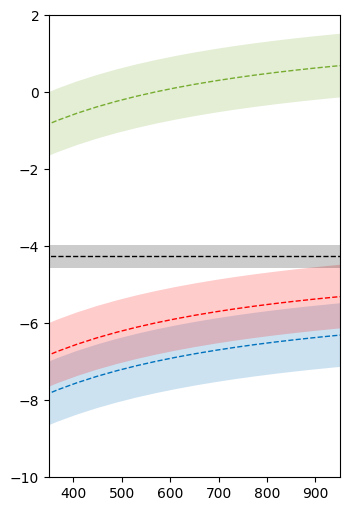

In [182]:
import numpy as np
import matplotlib.pyplot as plt

colors = [
    [0, 0.4470, 0.7410],
    [1,0,0],
    [0.4660, 0.6740, 0.1880]
]

R = 8.314 # J/mol/K
T = np.linspace(0.,2000.,50) + 273.15 # K

#M0 = 2320. # kg 
#Mj = 0.231 # kg/mol

rho0 = 2780. # kg/m3

yr = 3.154e7
mm = 1e-3
km = 1e3

v0 = 1. * mm / yr # m/s
h0 = 50. * km # m

Tr = 5273.15 # = 2000 C

S0 = 6000 # 1/m
Sj = 1 # 1/m

rj = np.exp(-Tr/T)
n = 1 # number of moles

Das = np.array([10, 100, 1e8])

def Rj(Da, A):
    r0S0 = Da*v0*rho0/h0
    r0 = r0S0/S0
    print(r0)
    Rj = r0S0 *rj*Sj*A/(n*R*(T)) 
    return Rj

def R_net(Da, A):   
    Rj_vol = Rj(Da,A) # kg/m3/s
    R_net= Rj_vol/(Sj*S0) # kg/m2/s
    R_net_gcy = R_net*1e3 / 100*2 * yr # g/cm2/yr
    return R_net_gcy

fig = plt.figure(figsize=[3.75,6])

for i, Da in enumerate(Das):
    col = colors[i]
    Rj_gcy = R_net(Da,100)
    Rj_gcy2= R_net(Da,4500)
    Rj_gcy3 = R_net(Da,670)
    
    p=plt.fill_between(T-273.15, np.log10(Rj_gcy), np.log10(Rj_gcy2),color=col,alpha=0.2,linewidth=0)
    plt.plot(T-273.15, np.log10(Rj_gcy3),'--',color=col,linewidth=1.)

plt.ylim([-11,1])
plt.xlim([350,950])
plt.yticks(np.arange(-11,2,1))
plt.xticks(np.arange(400,1000,100))

fig = plt.figure(figsize=[3.75,6])

for i, Da in enumerate(Das):
    col = colors[i]
    Rj_yr = Rj(Da,100)*yr
    Rj_yr2= Rj(Da,4500)*yr
    Rj_yr3 = Rj(Da,670)*yr

    p=plt.fill_between(T-273.15, np.log10(Rj_yr), np.log10(Rj_yr2),color=col,alpha=0.2,linewidth=0)
    plt.plot(T-273.15, np.log10(Rj_yr3),'--',color=col,linewidth=1.)

advection = np.ones(T.shape)*(rho0*v0/h0) # kg/m3/s
plt.fill_between(T-273.15, np.log10(advection*(2)*yr), np.log10(advection*(0.5)*yr),color='black',alpha=0.2,linewidth=0)
plt.plot(T-273.15, np.log10(advection*yr),'--',color='black',linewidth=1.)

plt.ylim([-10,2])
plt.xlim([350,950])
#plt.yticks(np.arange(-7,6,1))
#plt.xticks(np.arange(400,1000,100))
